# Práctica Grupal: SQL Murder

A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a **murder** that occurred sometime on **Jan.15, 2018** and that it took place in **SQL City**. Start by retrieving the corresponding crime scene report from the police department’s database.



![Captura de Pantalla 2023-12-09 a las 6.37.39.png](<attachment:Captura de Pantalla 2023-12-09 a las 6.37.39.png>)
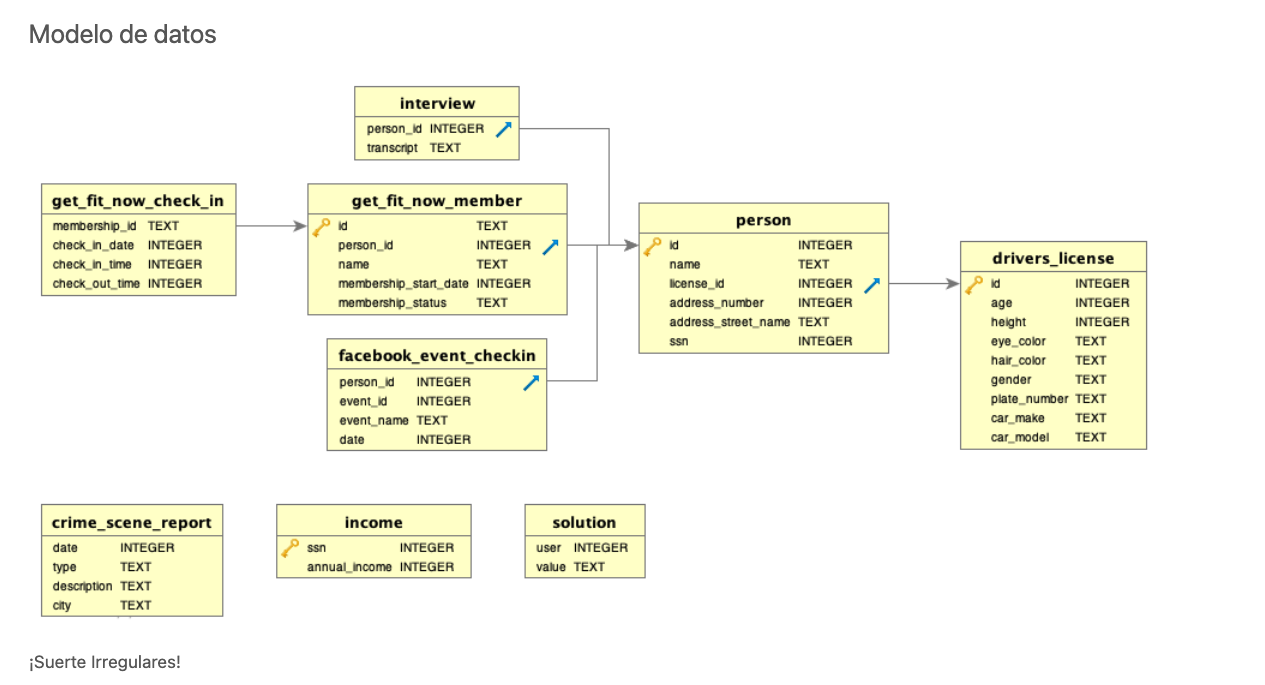

In [1]:
import pandas as pd
import sqlite3

fichero="./sql-murder-mystery.db"

connection = sqlite3.connect(fichero)
cursor = connection.cursor()

def sql(query):
    return pd.read_sql(query, connection) 
    pd.set_option('display.max_colwidth', None)

#### Primero buscamos los primeros datos sobre el delito:

In [2]:
query = '''
SELECT *
FROM crime_scene_report
WHERE date=20180115 and type="murder"
'''

result = sql(query)
result


,date,type,description,city
0,20180115,murder,Life? Dont talk to me about life.,Albany
1,20180115,murder,"Mama, I killed a man, put a gun against his he...",Reno
2,20180115,murder,Security footage shows that there were 2 witne...,SQL City


#### Investigamos en la dirección que nos dan en la declarción:

In [14]:
query = '''
SELECT *
  FROM person
  WHERE address_street_name ="Northwestern Dr"
  ORDER BY  address_number DESC
'''

result = sql(query)
result


#Morty Schapiro

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949
1,17729,Lasonya Wildey,439686,3824,Northwestern Dr,917817122
2,53890,Sophie Tiberio,957671,3755,Northwestern Dr,442830147
3,73368,Torie Thalmann,773862,3697,Northwestern Dr,341559436
4,96595,Coretta Cubie,303645,3631,Northwestern Dr,378403829
5,19420,Cody Schiel,890431,3524,Northwestern Dr,947110049
6,93509,Emmitt Aceuedo,916706,3491,Northwestern Dr,979073160
7,87456,Leonora Wolfsberger,215868,3483,Northwestern Dr,565203106
8,36378,Freddie Ellzey,267882,3449,Northwestern Dr,474117596
9,53076,Boris Bijou,664914,3327,Northwestern Dr,401191868


In [15]:
query = '''
SELECT *
    FROM person
    WHERE address_street_name ="Franklin Ave"
    ORDER BY  name 
'''

result = sql(query)
result

#ANNABEL MILLER

,id,name,license_id,address_number,address_street_name,ssn
0,33793,Amado Mattan,161915,99,Franklin Ave,125205748
1,16371,Annabel Miller,490173,103,Franklin Ave,318771143
2,46827,Bev Billiter,643591,2316,Franklin Ave,940192302
3,78658,Blake Chrones,310242,2014,Franklin Ave,423048084
4,97913,Cameron Dilick,971988,2954,Franklin Ave,665147939
5,78830,Candice Train,814779,3255,Franklin Ave,717570815
6,18651,Carleen Etoll,356746,22,Franklin Ave,193369255
7,30654,Clarita Rickels,418084,2254,Franklin Ave,714941023
8,61437,Colette Hollomon,661377,453,Franklin Ave,314956038
9,34592,Cordell Lindamood,592762,3657,Franklin Ave,509890333


#### Con los datos de id de los sospechosos vamos a investigar a la tabla de interview

In [16]:
query = '''
SELECT *
  FROM interview
  WHERE person_id=14887
'''

result = sql(query)
result

,person_id,transcript
0,14887,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership number on the bag started with ""48Z"". Only gold members have those bags. The man got into a car with a plate that included ""H42W""."


In [17]:
query = '''
SELECT *
  FROM interview
  WHERE person_id=16371
'''

result = sql(query)
result

,person_id,transcript
0,16371,"I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th."


#### Con los datos obtenidos de los testigos seguimos investigando, acudimos a los datos de entrada de la tabla get_fit_now_check_in

In [18]:
query = '''
SELECT *
  FROM get_fit_now_check_in
  WHERE check_in_date= 20180109 and membership_id LIKE '%48Z%'
'''

result = sql(query)
result

,membership_id,check_in_date,check_in_time,check_out_time
0,48Z7A,20180109,1600,1730
1,48Z55,20180109,1530,1700


In [22]:
query = '''
SELECT *
FROM drivers_license
WHERE plate_number LIKE '%H42W%'
'''

result = sql(query)
result

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,183779,21,65,blue,blonde,female,H42W0X,Toyota,Prius
1,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
2,664760,21,71,black,black,male,4H42WR,Nissan,Altima


In [23]:
query = '''
SELECT *
  FROM person
  WHERE license_id = 183779 or license_id = 423327 or license_id = 664760
'''

result = sql(query)
result

,id,name,license_id,address_number,address_street_name,ssn
0,51739,Tushar Chandra,664760,312,Phi St,137882671
1,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279
2,78193,Maxine Whitely,183779,110,Fisk Rd,137882671


#### Con estos datos investigamos suscripciones en el gimnasio de los sospechosos:

In [24]:
query = '''
SELECT *
  FROM get_fit_now_member
  WHERE name="Maxine Whitely" or name="Tushar Chandra" or name="Jeremy Bowers"
'''

result = sql(query)
result

,id,person_id,name,membership_start_date,membership_status
0,48Z55,67318,Jeremy Bowers,20160101,gold


Encontramos un sujeto que concuerda 100%

![Captura de Pantalla 2023-12-09 a las 7.07.07.png](<attachment:Captura de Pantalla 2023-12-09 a las 7.07.07.png>)
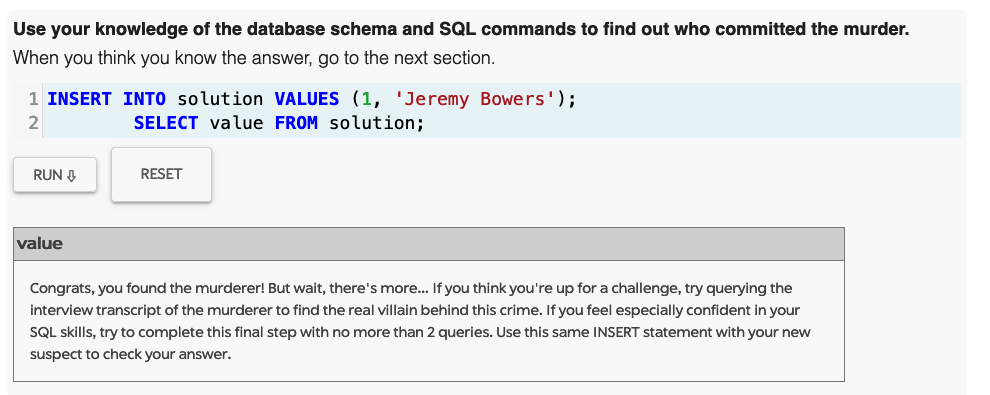

### Ahora seguimos investigando con los datos del primer caso

In [25]:
query = '''
SELECT *
  FROM interview
  WHERE person_id=67318
'''

result = sql(query)
result

,person_id,transcript
0,67318,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" (65"") or 5'7"" (67""). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.\n"


#### Creamos una consulta que agrupe todos los datos que tenemos

In [26]:
query = '''
SELECT A.*, subgrupo.*
  FROM drivers_license as A
  INNER JOIN (
    SELECT A.*, B.*
FROM (
    SELECT person_id
    FROM facebook_event_checkin
  	WHERE date >=20171201 and date <20171231 and event_name LIKE '%Symphony%'
  	GROUP BY person_id
  	HAVING COUNT(person_id) = 3
) AS A
INNER JOIN person AS B ON A.person_id = B.id
  ) as subgrupo
  ON A.id=subgrupo.license_id
'''

result = sql(query)
result

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model,person_id,id,name,license_id,address_number,address_street_name,ssn
0,202298,68,66,green,red,female,500123,Tesla,Model S,99716,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


![Captura de Pantalla 2023-12-09 a las 8.03.20.png](<attachment:Captura de Pantalla 2023-12-09 a las 8.03.20.png>)
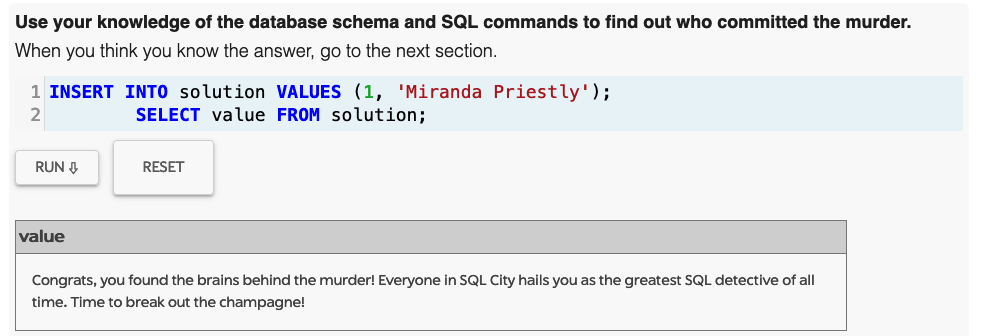